<a href="https://colab.research.google.com/github/Pravallikavyas/Customer-Conversion-Prediction/blob/main/newpro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING NECESSARY PACKAGES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split

**IMPORTING DATASET**

In [2]:
df=pd.read_csv('/content/train.csv')

In [3]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


**CHECKING THE NULL VALUES IN DATASET**

In [4]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

**CHECKING THE DUPLICATE VALUES IN THE DATASET**

In [5]:
df=df.drop_duplicates()

In [6]:
df.describe()

,age,day,dur,num_calls
count,45205.000000,45205.00000,45205.000000,45205.000000
mean,40.937087,15.80688,258.183055,2.763898
std,10.619130,8.32234,257.538504,3.098189
min,18.000000,1.00000,0.000000,1.000000
25%,33.000000,8.00000,103.000000,1.000000
50%,39.000000,16.00000,180.000000,2.000000
75%,48.000000,21.00000,319.000000,3.000000
max,95.000000,31.00000,4918.000000,63.000000


**CHECKING FOR OUTLIERS IN DATASET**

In [7]:
iqr = df.dur.quantile(0.75) - df.dur.quantile(0.25)
upper_threshold = df.dur.quantile(0.75) + (1.5 * iqr)
lower_threshold = df.dur.quantile(0.25) - (1.5 * iqr)
upper_threshold,lower_threshold

(643.0, -221.0)

In [8]:
df['dur']=df['dur'].clip(-221,643)

<ipython-input-8-1d639cc980b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dur']=df['dur'].clip(-221,643)


In [9]:
iqr = df['num_calls'].quantile(0.75) - df['num_calls'].quantile(0.25)
upper_threshold = df['num_calls'].quantile(0.75) + (1.5 * iqr)
lower_threshold = df['num_calls'].quantile(0.25) - (1.5 * iqr)
upper_threshold,lower_threshold

(6.0, -2.0)

In [10]:
df['num_calls']=df['num_calls'].clip(-2.0,6.0)

<ipython-input-10-b7649c82100a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_calls']=df['num_calls'].clip(-2.0,6.0)


**CHECKING THE DATATYPES OF THE VARIABLES**

In [11]:
df.dtypes

age                 int64
job                object
marital            object
education_qual     object
call_type          object
day                 int64
mon                object
dur                 int64
num_calls         float64
prev_outcome       object
y                  object
dtype: object

**LABEL ENCODING FOR THE VARIABLES**

In [12]:
df["y"]=df["y"].map({"yes":1,"no":0})

<ipython-input-12-9dc08d29ff47>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y"]=df["y"].map({"yes":1,"no":0})


In [13]:
df.job.mode()

0    blue-collar
dtype: object

In [14]:
288*100/df.shape[0]

0.6370976661873686

In [15]:
df.loc[df.job=="unknown","job"]="blue-collar"

/usr/local/lib/python3.9/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


<AxesSubplot:ylabel='job'>

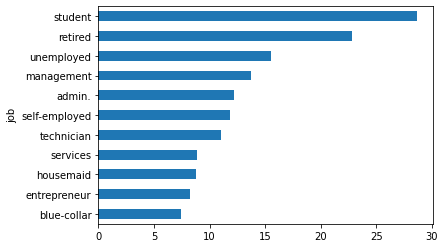

In [16]:
(df.groupby("job")["y"].mean()*100).sort_values( ).plot(kind="barh")

In [17]:
df["job"]=df["job"].map({"blue-collar":1,"entrepreneur":2,"housemaid":3,"services":4,"technician":5,"self-employed":6,"admin.":7,"management":8,"unemployed":9,"retired":10,"student":11})

<ipython-input-17-f484c04da8ef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["job"]=df["job"].map({"blue-collar":1,"entrepreneur":2,"housemaid":3,"services":4,"technician":5,"self-employed":6,"admin.":7,"management":8,"unemployed":9,"retired":10,"student":11})


In [18]:
df.job.value_counts()

1     10018
8      9457
5      7596
7      5170
4      4153
10     2264
6      1579
2      1487
9      1303
3      1240
11      938
Name: job, dtype: int64

In [19]:
df.marital.value_counts()

married     27210
single      12788
divorced     5207
Name: marital, dtype: int64

<AxesSubplot:ylabel='marital'>

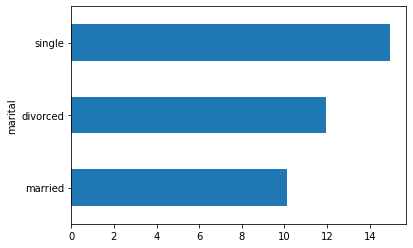

In [20]:
(df.groupby("marital")["y"].mean()*100).sort_values( ).plot(kind="barh")

In [21]:
df["marital"]=df["marital"].map({"married":1,"divorced":2,"single":3})

<ipython-input-21-66873c366328>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["marital"]=df["marital"].map({"married":1,"divorced":2,"single":3})


In [22]:
df.education_qual.value_counts()

secondary    23199
tertiary     13299
primary       6850
unknown       1857
Name: education_qual, dtype: int64

In [23]:
1857*100/df.shape[0]

4.107952660103971

In [24]:
df.education_qual.mode()

0    secondary
dtype: object

In [25]:
df.loc[df.education_qual=="unknown","education_qual"]="secondary"

In [26]:
df.education_qual.value_counts()

secondary    25056
tertiary     13299
primary       6850
Name: education_qual, dtype: int64

<AxesSubplot:ylabel='education_qual'>

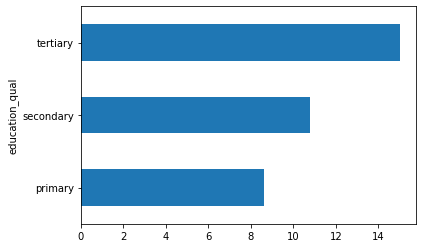

In [27]:
(df.groupby("education_qual")["y"].mean()*100).sort_values( ).plot(kind="barh")

In [28]:
df["education_qual"]=df["education_qual"].map({"primary":1,"secondary":2,"tertiary":3})

<ipython-input-28-8267a760e5f2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["education_qual"]=df["education_qual"].map({"primary":1,"secondary":2,"tertiary":3})


In [29]:
df.education_qual.value_counts()

2    25056
3    13299
1     6850
Name: education_qual, dtype: int64

In [30]:
df.call_type.value_counts()

cellular     29282
unknown      13017
telephone     2906
Name: call_type, dtype: int64

In [31]:
13017*100/df.shape[0]

28.795487224864505

<AxesSubplot:ylabel='call_type'>

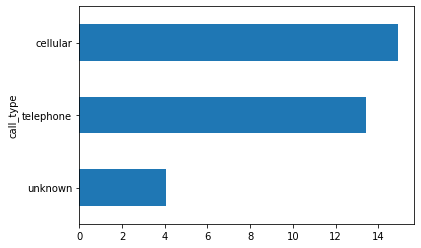

In [32]:
(df.groupby("call_type")["y"].mean()*100).sort_values( ).plot(kind="barh")

In [33]:
df["call_type"]=df["call_type"].map({"unknown":1,"telephone":2,"cellular":3})

<ipython-input-33-58b3a5834703>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["call_type"]=df["call_type"].map({"unknown":1,"telephone":2,"cellular":3})


In [34]:
df.day.value_counts()

20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1840
28    1829
7     1817
19    1756
29    1745
15    1703
12    1603
13    1585
30    1566
9     1560
11    1479
4     1445
16    1415
2     1292
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64

In [35]:
df.mon.value_counts()

may    13765
jul     6894
aug     6245
jun     5339
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: mon, dtype: int64

<AxesSubplot:ylabel='mon'>

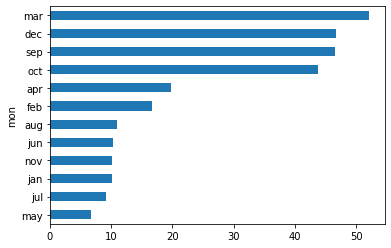

In [36]:
(df.groupby("mon")["y"].mean()*100).sort_values( ).plot(kind="barh")

In [37]:
df["mon"]=df["mon"].map({"may":1,"jul":2,"jan":3,"nov":4,"jun":5,"aug":6,"feb":7,"apr":8,"oct":9,"sep":10,"dec":11,"mar":12})

<ipython-input-37-8bd2d7a46e8d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["mon"]=df["mon"].map({"may":1,"jul":2,"jan":3,"nov":4,"jun":5,"aug":6,"feb":7,"apr":8,"oct":9,"sep":10,"dec":11,"mar":12})


In [38]:
df.dur.value_counts()

643    3247
124     187
90      184
89      177
114     175
       ... 
598       7
3         4
0         3
2         3
1         2
Name: dur, Length: 644, dtype: int64

In [39]:
df.num_calls.value_counts()

1.0    17542
2.0    12503
3.0     5521
6.0     4355
4.0     3520
5.0     1764
Name: num_calls, dtype: int64

In [40]:
df.prev_outcome.value_counts()

unknown    36953
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

In [41]:
36953*100/df.shape[0]

81.74538214799247

<AxesSubplot:ylabel='prev_outcome'>

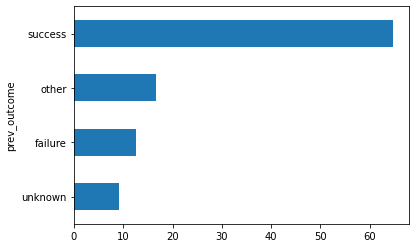

In [42]:
(df.groupby("prev_outcome")["y"].mean()*100).sort_values( ).plot(kind="barh")

In [43]:
df["prev_outcome"]=df["prev_outcome"].map({"unknown":1,"failure":2,"other":3,"success":4})

<ipython-input-43-7f6682242f59>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["prev_outcome"]=df["prev_outcome"].map({"unknown":1,"failure":2,"other":3,"success":4})


In [44]:
df.prev_outcome.value_counts()

1    36953
2     4901
3     1840
4     1511
Name: prev_outcome, dtype: int64

**CONVERSION OF DATA INTO NUMERICAL**

In [45]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,8,1,3,1,5,1,261,1.0,1,0
1,44,5,3,2,1,5,1,151,1.0,1,0
2,33,2,1,2,1,5,1,76,1.0,1,0
3,47,1,1,2,1,5,1,92,1.0,1,0
4,33,1,3,2,1,5,1,198,1.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,5,1,3,3,17,4,643,3.0,1,1
45207,71,10,2,1,3,17,4,456,2.0,1,1
45208,72,10,1,2,3,17,4,643,5.0,4,1
45209,57,1,1,2,2,17,4,508,4.0,1,0


In [46]:
df.head()


,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,8,1,3,1,5,1,261,1.0,1,0
1,44,5,3,2,1,5,1,151,1.0,1,0
2,33,2,1,2,1,5,1,76,1.0,1,0
3,47,1,1,2,1,5,1,92,1.0,1,0
4,33,1,3,2,1,5,1,198,1.0,1,0


In [47]:
df.tail()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
45206,51,5,1,3,3,17,4,643,3.0,1,1
45207,71,10,2,1,3,17,4,456,2.0,1,1
45208,72,10,1,2,3,17,4,643,5.0,4,1
45209,57,1,1,2,2,17,4,508,4.0,1,0
45210,37,2,1,2,3,17,4,361,2.0,3,0


**CHECKING IF IT IS IMBALANCED DATASET**

Class 0: 39916
Class 1: 5289
Proportion of class 0 is  88.3 %


<AxesSubplot:title={'center':'Count (target)'}>

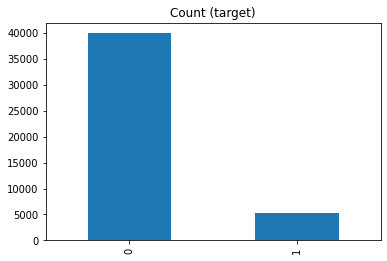

In [48]:
target_count=df.y.value_counts()
print('Class 0:',target_count[0])
print('Class 1:',target_count[1])
print('Proportion of class 0 is ',round(target_count[0] * 100 / (target_count[1] + target_count[0]), 2),'%')
target_count.plot(kind='bar', title='Count (target)')

**CORRELATION BETWEEN VARIABLES**

In [49]:
cr=df.corr()
cr

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
age,1.000000,0.097369,-0.376110,-0.164885,-0.026262,-0.009175,0.110645,-0.011798,0.023924,0.012204,0.025126
job,0.097369,1.000000,0.125127,0.404557,0.143050,0.010690,0.176022,0.003630,-0.030017,0.075029,0.118438
marital,-0.376110,0.125127,1.000000,0.161119,0.040763,-0.007615,0.001519,0.024916,-0.047872,0.037144,0.065673
education_qual,-0.164885,0.404557,0.161119,1.000000,0.153952,0.026000,0.105310,0.000181,0.001557,0.050750,0.068640
call_type,-0.026262,0.143050,0.040763,0.153952,1.000000,0.027990,0.303790,0.030349,-0.004183,0.251073,0.148391
day,-0.009175,0.010690,-0.007615,0.026000,0.027990,1.000000,-0.128265,-0.039335,0.153025,-0.072659,-0.028371
mon,0.110645,0.176022,0.001519,0.105310,0.303790,-0.128265,1.000000,-0.002595,-0.008706,0.168904,0.204187
dur,-0.011798,0.003630,0.024916,0.000181,0.030349,-0.039335,-0.002595,1.000000,-0.100056,0.041147,0.390642
num_calls,0.023924,-0.030017,-0.047872,0.001557,-0.004183,0.153025,-0.008706,-0.100056,1.000000,-0.102162,-0.084067
prev_outcome,0.012204,0.075029,0.037144,0.050750,0.251073,-0.072659,0.168904,0.041147,-0.102162,1.000000,0.259300


**SPLITTING THE DATA INTO TRAIN AND TEST DATA**

In [51]:
X = df[['age','job','marital','education_qual','call_type','day','mon','dur','num_calls','prev_outcome']].values
y = df['y'].values
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=7)

In [52]:
X_train.shape

(36164, 10)

In [53]:
y_train.shape

(36164,)

In [54]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [55]:
import imblearn

**APPLYING SMOTEENN TECHNIQUE TO BALANCE DATA**

In [56]:
from imblearn.combine import SMOTEENN
smt = SMOTEENN(sampling_strategy='all')
X_smt,y_smt=smt.fit_resample(X_train,y_train)

In [57]:
import collections,numpy
counter=collections.Counter(y_smt)
counter

Counter({0: 24044, 1: 30725})

**SCALING THE DATASET**

In [58]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
Scaler.fit(X_smt)
X_train=Scaler.transform(X_smt)
X_test=Scaler.transform(X_test)

**LOGISTIC REGRESSION**

In [59]:
from sklearn.linear_model import LogisticRegression 
logistic_regression= LogisticRegression() 
logistic_regression.fit(X_train,y_smt)
y_pred=logistic_regression.predict(X_test)

In [67]:
y_pred

array([0, 1, 1, ..., 0, 0, 1])

In [68]:
import collections,numpy
c1=collections.Counter(y_pred)
c1

Counter({0: 6162, 1: 2879})

In [69]:
logistic_regression.predict_proba(X_test)

array([[0.81035165, 0.18964835],
       [0.00700956, 0.99299044],
       [0.35478315, 0.64521685],
       ...,
       [0.89242906, 0.10757094],
       [0.995322  , 0.004678  ],
       [0.30313627, 0.69686373]])

In [70]:
logistic_regression.coef_

array([[ 0.12958633,  0.47609217,  0.29395159,  0.14526905,  0.48763866,
        -0.03313325,  1.25539308,  2.77835303, -0.43546132,  0.95116228]])

In [71]:
logistic_regression.intercept_

array([0.64799574])

In [72]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [73]:
import scikitplot as skplt

In [74]:
from sklearn.metrics import roc_auc_score
y_train_pred=logistic_regression.predict_proba(X_train)
train_accuracy = roc_auc_score(y_smt,y_train_pred[:,-1])
print("Auroc score for train data is:",train_accuracy)

Auroc score for train data is: 0.9570857333835623


In [75]:
print("Auroc Score for test data is:",roc_auc_score(y_test,logistic_regression.predict_proba(X_test)[:, 1]))

Auroc Score for test data is: 0.8992153358253686


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

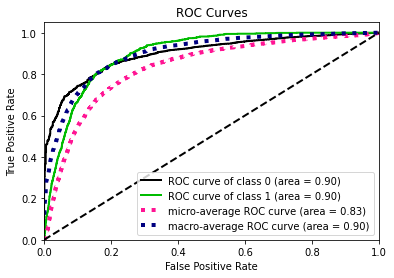

In [76]:
skplt.metrics.plot_roc(y_test,logistic_regression.predict_proba(X_test))

**K-NN**

In [77]:
from mlxtend.plotting import plot_decision_regions 
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [86]:
for i in [1,2,3,4,5,6,7,8,9,10,20,30,40,50]: 
  knn= KNeighborsClassifier(i)
  knn.fit(X_train,y_smt) 
  print("K value  : " , i, " train score : ", knn.score(X_train,y_smt)," cv score : ",np.mean(cross_val_score(knn,X_train,y_smt,cv=10)))

K value  :  1  train score :  1.0  cv score :  0.9669338696798739
K value  :  2  train score :  0.9952345304825723  cv score :  0.9614198054871338
K value  :  3  train score :  0.9770673191038727  cv score :  0.9561066078439714
K value  :  4  train score :  0.9765743394986215  cv score :  0.9544451043229719
K value  :  5  train score :  0.9662582847961438  cv score :  0.9500630467031732
K value  :  6  train score :  0.9663130603078384  cv score :  0.9490588473239508
K value  :  7  train score :  0.9604155635487228  cv score :  0.9459549416625445
K value  :  8  train score :  0.9603060125253337  cv score :  0.9448046835875052
K value  :  20  train score :  0.9394548010736  cv score :  0.931603736216515
K value  :  30  train score :  0.9321879165221202  cv score :  0.926180936202698
K value  :  40  train score :  0.9279154266099435  cv score :  0.9231135068717539
K value  :  50  train score :  0.9248114809472512  cv score :  0.920575584491518


In [88]:
knn= KNeighborsClassifier(1)
knn.fit(X_train,y_smt) 
y_pred=knn.predict(X_test)
y_train_pred=knn.predict_proba(X_train)
train_accuracy = roc_auc_score(y_smt,y_train_pred[:,-1])
print("AUROC score for train data is:",train_accuracy)
print("AUROC score for test data is : ",roc_auc_score(y_test,knn.predict_proba(X_test)[:, 1]))

AUROC score for train data is: 1.0
AUROC score for test data is :  0.7831426768915191


In [81]:
y_pred

array([0, 0, 0, ..., 0, 0, 1])

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

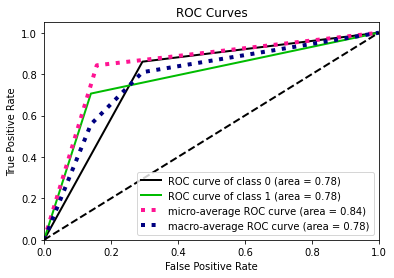

In [82]:
skplt.metrics.plot_roc(y_test,knn.predict_proba(X_test))

In [83]:
import collections,numpy
c2=collections.Counter(y_pred)
c2

Counter({0: 7193, 1: 1848})

**DECISION TREE**

In [84]:
from sklearn.model_selection import cross_val_score #this will help me to do cross- validation
import numpy as np
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import roc_auc_score,accuracy_score
for depth in [1,2,3,4,5,6,7,8,9,10,20]:
  dt = DecisionTreeClassifier(max_depth=depth) # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  dt.fit(X_train,y_smt) # the model is trained
  trainAccuracy = accuracy_score(y_smt, dt.predict(X_train)) # this is useless information - i am showing to prove a point
  dt = DecisionTreeClassifier(max_depth=depth) # a fresh model which is not trained yet
  valAccuracy = cross_val_score(dt,X_train,y_smt, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth," Training Accuracy : ", trainAccuracy," Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.7789077762968103  Cross val score :  0.7786338960735331
Depth  :  2  Training Accuracy :  0.8337380635030766  Cross val score :  0.8334641891125022
Depth  :  3  Training Accuracy :  0.8709123774397926  Cross val score :  0.869816836807298
Depth  :  4  Training Accuracy :  0.8875641329949424  Cross val score :  0.8839491342573025
Depth  :  5  Training Accuracy :  0.9130712629407146  Cross val score :  0.9109168989170865
Depth  :  6  Training Accuracy :  0.9227300115028575  Cross val score :  0.9213790873662129
Depth  :  7  Training Accuracy :  0.9337398893534664  Cross val score :  0.9317681231014138
Depth  :  8  Training Accuracy :  0.9469955631835527  Cross val score :  0.9411530894918428
Depth  :  9  Training Accuracy :  0.9545911008052  Cross val score :  0.9459915380248074
Depth  :  10  Training Accuracy :  0.9628074275593858  Cross val score :  0.9497345863497436
Depth  :  20  Training Accuracy :  0.9987766802388213  Cross val score :  0.9578231

In [87]:
dt=DecisionTreeClassifier(max_depth=20) 
dt.fit(X_train,y_smt)
y_train_pred=dt.predict_proba(X_train)
train_accuracy = roc_auc_score(y_smt,y_train_pred[:,-1])
print("AUROC on train data is:",train_accuracy) 
print("AUROC on the sampled dataset : ",roc_auc_score(y_test,dt.predict_proba(X_test)[:, 1]))

AUROC on train data is: 0.9999917874999712
AUROC on the sampled dataset :  0.8064310978880667


In [104]:
y_pred = dt.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 0, 1])

In [105]:
import collections,numpy
c3=collections.Counter(y_pred)
c3

Counter({0: 7261, 1: 1780})

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

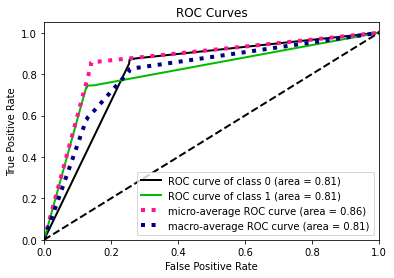

In [106]:
skplt.metrics.plot_roc(y_test,dt.predict_proba(X_test))

**RANDOM FOREST**

In [107]:
from sklearn.ensemble import RandomForestClassifier 
classifier=RandomForestClassifier(n_estimators=100,criterion="entropy") 
classifier.fit(X_train,y_smt) 
y_pred=classifier.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [108]:
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [109]:
import collections,numpy
c3=collections.Counter(y_pred)
c3

Counter({0: 7328, 1: 1713})

In [110]:
y_train_pred=classifier.predict_proba(X_train)
train_accuracy = roc_auc_score(y_smt,y_train_pred[:,-1])
print("AUROC on the train data is:",train_accuracy)

AUROC on the train data is: 1.0


In [111]:
print( "AUROC on the test data is : ",roc_auc_score( y_test,classifier.predict_proba(X_test)[:, 1]))

AUROC on the test data is :  0.9243237417825196


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

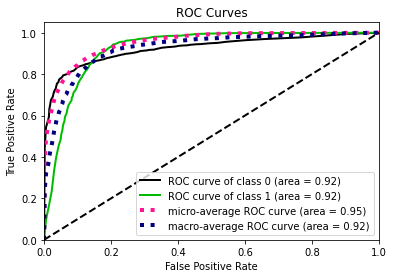

In [112]:
skplt.metrics.plot_roc(y_test,classifier.predict_proba(X_test))

**BOOTSTRAP AGGREGATION**

In [89]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
model = BaggingClassifier(tree.DecisionTreeClassifier(max_depth=1,random_state=1),n_estimators=100)
model.fit(X_train, y_smt)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=1, random_state=1),
                  n_estimators=100)

In [90]:
y_train_pred=model.predict_proba(X_train)
train_accuracy = roc_auc_score(y_smt,y_train_pred[:,-1])
print("AUROC on the train data is:",train_accuracy)

AUROC on the train data is: 0.7972386270681672


In [91]:
print( "AUROC on the test data is : ",roc_auc_score(y_test,model.predict_proba(X_test)[:, 1]))

AUROC on the test data is :  0.7455230549591865


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

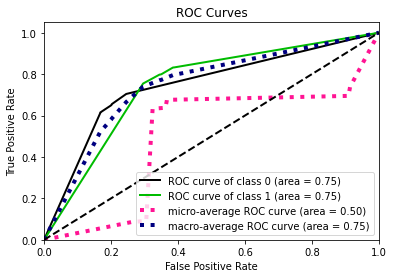

In [92]:
skplt.metrics.plot_roc(y_test,model.predict_proba(X_test))

**XGBOOST**

In [93]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score 
import numpy as np 
for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]: 
  model = xgb.XGBClassifier(learning_rate = lr, n_estimators=100,verbosity = 0) # initialise the model model.fit(X_smt,y_smt) #train the model 
  print("Learning rate : ", lr," Cross-Val score : ",np.mean(cross_val_score(model,X_test,y_test,cv=10)))

Learning rate :  0.01  Cross-Val score :  0.9005648315650516
Learning rate :  0.02  Cross-Val score :  0.901559795629003
Learning rate :  0.03  Cross-Val score :  0.9014489316970614
Learning rate :  0.04  Cross-Val score :  0.9025551263873272
Learning rate :  0.05  Cross-Val score :  0.9028868625629493
Learning rate :  0.1  Cross-Val score :  0.9000103896738864
Learning rate :  0.12  Cross-Val score :  0.9011168288270669
Learning rate :  0.13  Cross-Val score :  0.9015588177773433
Learning rate :  0.14  Cross-Val score :  0.9017803011783112
Learning rate :  0.15  Cross-Val score :  0.9006742287195033
Learning rate :  0.2  Cross-Val score :  0.9004528675499927
Learning rate :  0.5  Cross-Val score :  0.8968019361462864
Learning rate :  0.7  Cross-Val score :  0.8955869554588569
Learning rate :  1  Cross-Val score :  0.8904983376521782


In [113]:
from sklearn.metrics import roc_curve,roc_auc_score
model = xgb.XGBClassifier(learning_rate=0.05, n_estimators=100,verbosity=0) # initialise the model 
model.fit(X_train,y_smt)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [114]:
y_train_pred=model.predict_proba(X_train)
train_accuracy = roc_auc_score(y_smt,y_train_pred[:,-1])
print("AUROC on the train data is",train_accuracy)

AUROC on the train data is 0.9960129882576275


In [115]:
print( "AUROC on the test data is : ",roc_auc_score(y_test,model.predict_proba(X_test)[:, 1]))

AUROC on the test data is :  0.9204667783117854


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

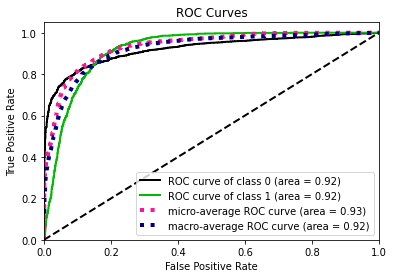

In [116]:
skplt.metrics.plot_roc(y_test,model.predict_proba(X_test))

**ENSEMBLE LEARNING**

In [98]:
from sklearn.ensemble import VotingClassifier # this is the function that ensembles my model
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
model1 = LogisticRegression(random_state=1)
model2 = tree.DecisionTreeClassifier(random_state=1)
model3 = KNeighborsClassifier(3)
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2),('knn',model3)], voting='soft') # it will stitich all the models together, voting = hard means max voting 
# we need to give the list of models that we are trying to combine
model.fit(X_train,y_smt) # to train all of the models
preds = model.predict(X_test)

In [99]:
y_train_pred=model.predict_proba(X_train)
train_accuracy = roc_auc_score(y_smt,y_train_pred[:,-1])
print("AUROC on the train data is:",train_accuracy)

AUROC on the train data is: 0.9999818694205728


In [100]:
print("AUROC on the test data is:",roc_auc_score(y_test,model.predict_proba(X_test)[:,1]))

AUROC on the test data is: 0.9094646483360398


In [101]:
import collections,numpy
c3=collections.Counter(y_test)
c3

Counter({0: 8010, 1: 1031})

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

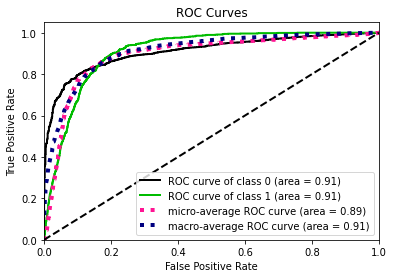

In [102]:
skplt.metrics.plot_roc(y_test,model.predict_proba(X_test))

**HEAT MAP**

<AxesSubplot:>

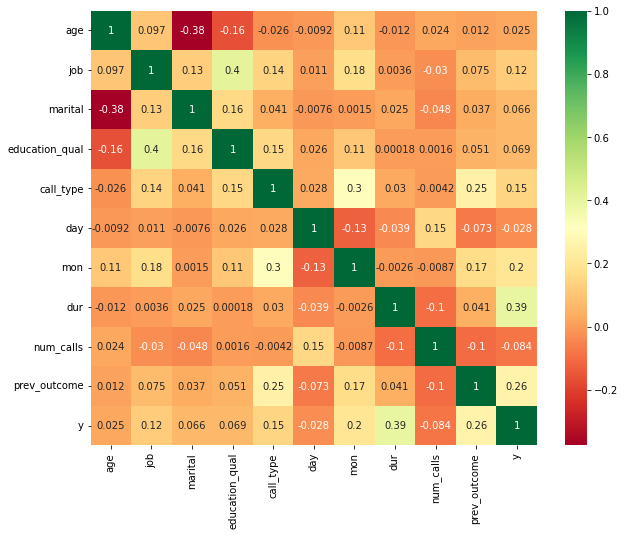

In [103]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(cr,cmap='RdYlGn',annot=True)

**XG BOOST ALGORITHM GIVES THE BEST RESULTS WITH AUROC SCORE OF 0.9204**

**FROM THE HEATMAP WE CAN OBSERVE THAT THE IMPORTANT FACTORS AFFECTING THE PRICE**
**1>DURATION OF CALLS(dur)**
**2>PREVIOUS OUTCOME(prev_outcome)**
**3>CALL TYPE(call_type)**
**4>JOB(job)**